In [2]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn import ensemble as en
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(2024)
diabetes = pd.read_csv('diabetes_preprocessed.csv')

y = diabetes.get('Outcome').values
X = diabetes.drop(axis='columns', columns ='Outcome').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

0.7987012987012987


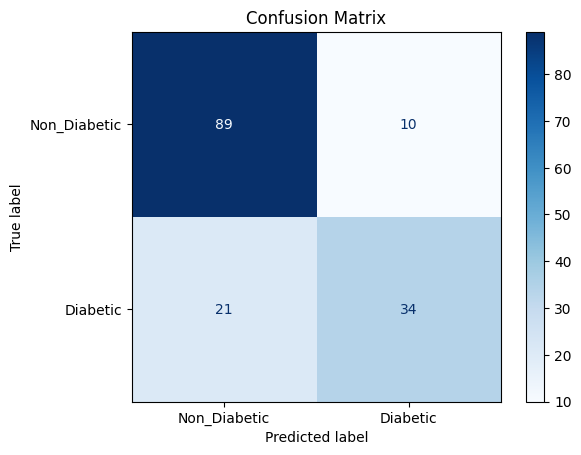

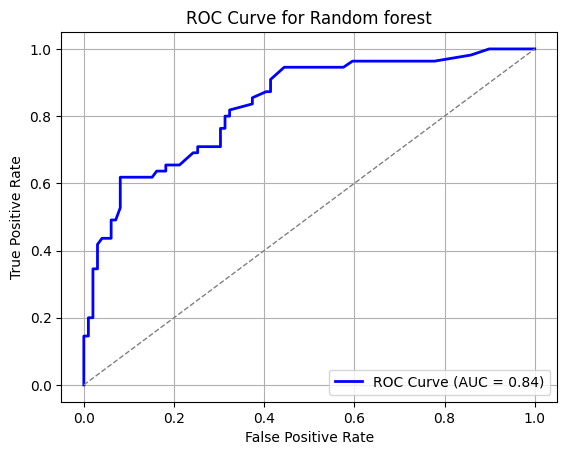

In [73]:
num_trees = 50 #the number of trees in the forest 
max_depth = 17
random_forest = en.RandomForestClassifier(
    random_state=2024,
    n_estimators=num_trees, 
    criterion="gini", 
    max_depth=max_depth,
    bootstrap=True)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
y_pred_prob_test = random_forest.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy = accuracy_score(y_test, y_pred) 
print(accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non_Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC AUC Plot
# Use predicted probabilities for the positive class (1)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

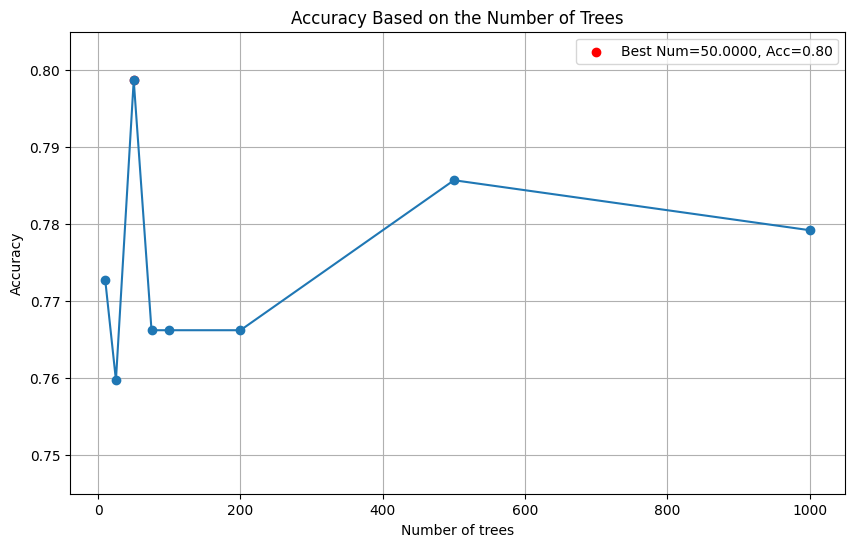

In [4]:
## testing different number of trees
trees = [10, 25, 50, 75, 100, 200, 500, 1000]

results = []
best_accuracy = 0

for tree in trees:
    random_forest = en.RandomForestClassifier(
    random_state=2024,
    n_estimators=tree, 
    criterion="gini")

    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num = tree 

plt.figure(figsize=(10, 6))
plt.plot(trees, results, marker='o')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.ylim(0.745,0.805)
plt.title("Accuracy Based on the Number of Trees")
plt.scatter([best_num], [best_accuracy], color='red', label=f'Best Num={best_num:.4f}, Acc={best_accuracy:.2f}')
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

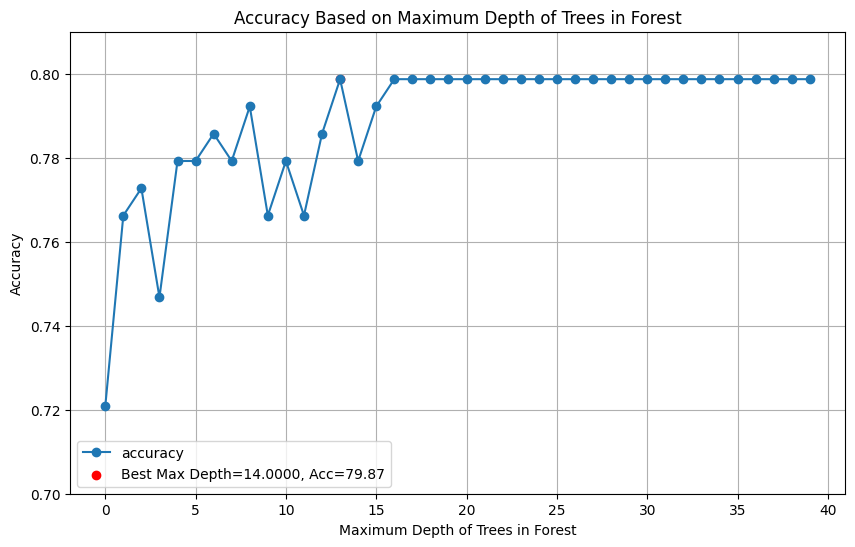

In [68]:
# testing different maximum depths
max_depths = list(range(40))
results = []
best_accuracy = 0

#for depth in max_depths:
for depth in range (1, len(max_depths)+1, 1):
    random_forest = en.RandomForestClassifier(
    random_state=2024,
    n_estimators=50,
    max_depth=depth, 
    criterion="gini")

    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num = depth 

acc_percent = best_accuracy*100
plt.figure(figsize=(10, 6))
plt.plot(max_depths, results, marker = 'o', label='accuracy')
plt.xlabel('Maximum Depth of Trees in Forest')
plt.ylabel('Accuracy')
plt.ylim(0.70,0.81)
plt.title("Accuracy Based on Maximum Depth of Trees in Forest")
plt.scatter([best_num-1], [best_accuracy], color='red', label=f'Best Max Depth={best_num:.4f}, Acc={acc_percent:.2f}')
plt.legend()
plt.grid()
plt.show